## MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 1.9: Digitalização de sinais e imagens

In [1]:
# Inclui  os módulos utilizados
import math as m
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Audio
from ipywidgets import Dropdown, Label, FloatSlider, IntSlider, Layout, ToggleButton, ToggleButtons, interactive, VBox, HBox, AppLayout

### Quantização e dequantização

A etapa final da digitalização de um sinal (ADC) consiste em converter (quantizar) cada amostra $x_k\in\mathbb{R}$ de um sinal $x$ em um dentre $R$ valores possíveis. Isso corresponde a segmentar a reta real em $R$ segmentos, e associar o valor $x_k$ ao segmento que o contém. Na etapa de decodificação (DAC), é necessário escolher um valor que represente cada segmento, para reconstruir as amostras $\tilde{x}_k$ do sinal de saída.

**Exemplo 1.25:** Considere um esquema de quantização de $R=4$ valores (2 bits) que divida a reta real nos segmentos $(-\infty,-5],(-5,3],(3,7],(7,\infty)$, designados por $S_0,S_1,S_2,S_3$. Então o mapa de quantização do sinal é a função

$$q(z) = k\ \text{tal que}\ z\in S_k.$$

Assim, dado por exemplo um sinal $x=(-1.2,2.3,4.4,8.8,-2.8)$, sua versão quantizada será 

$$q(x) = (1,1,2,3,1).$$

Para reconstruir o sinal a partir da versão quantizada, é necessário associar a cada intervalo $S_k$ com $k=0,1,\ldots,R-1$ um valor representativo $z_k\in S_k$, e definir o mapa de dequantização como

$$\tilde{q}(k) = z_k.$$

Por exemplo, se usarmos $z=(-10,-1,5,10)$, o sinal dequantizado será

$$\tilde{x}=\tilde{q}(q(x)) = \tilde{q}(1,1,2,3,1) = (z_1,z_1,z_2,z_3,z_1) = (-1,-1,5,10,-1).$$

**É importante observar que esse passo de quantização não é inversível, ou seja, acarreta perdas irreversíveis à representação do sinal.**

### Generalização do esquema de quantização

Considere $R-1$ pontos $y_1,\ldots,y_{R-1}$ de divisão da reta real em $R$ segmentos da forma $S_k=(y_k,y_{k+1}],\ k=0,1,\ldots,R-1$ (considere $y_0=-\infty$ e $y_R=+\infty$).
O mapa de quantização então é definido como

$$q(z) = k\ \text{tal que}\ z\in S_k.$$

Outra maneira de expressar essa função de quantização é como um somatório de "degraus", representado pela função de Heaviside

$$H(z) = \left\{\begin{array}{ll}0,&x\le 0\\1,&x>0,\end{array}\right\}$$

de tal modo que

$$q(z) = \sum_{k=1}^{R-1}H(z-y_k).$$

Um sinal $x=(\ldots,x_k,\ldots)$ produz como versão quantizada o sinal $q(x)=(\ldots,q(x_k),\ldots)$.

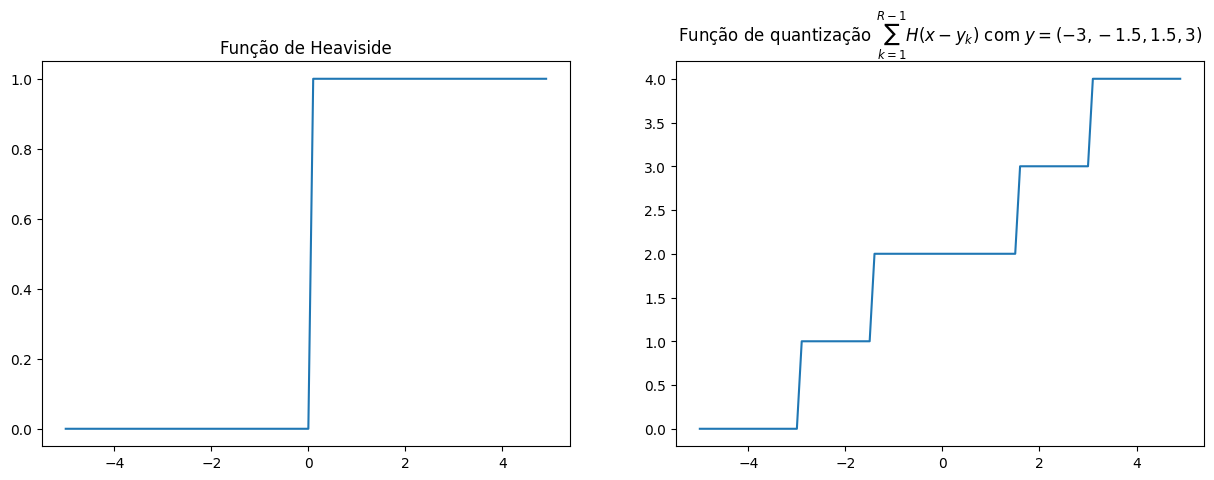

In [2]:
# Figura 1.11
R = 4; y = np.array([-3,-1.5,1.5,3]);
z = np.arange(-5,5,0.1); H = z>0; Q = sum(z-y[k]>0 for k in range(R))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(z,H)
ax.set_title("Função de Heaviside")
ax = fig.add_subplot(1, 2, 2)
ax.plot(z,Q)
ax.set_title(r"Função de quantização $\sum_{k=1}^{R-1}H(x-y_k)$ com $y=(-3,-1.5,1.5,3)$")
plt.show()

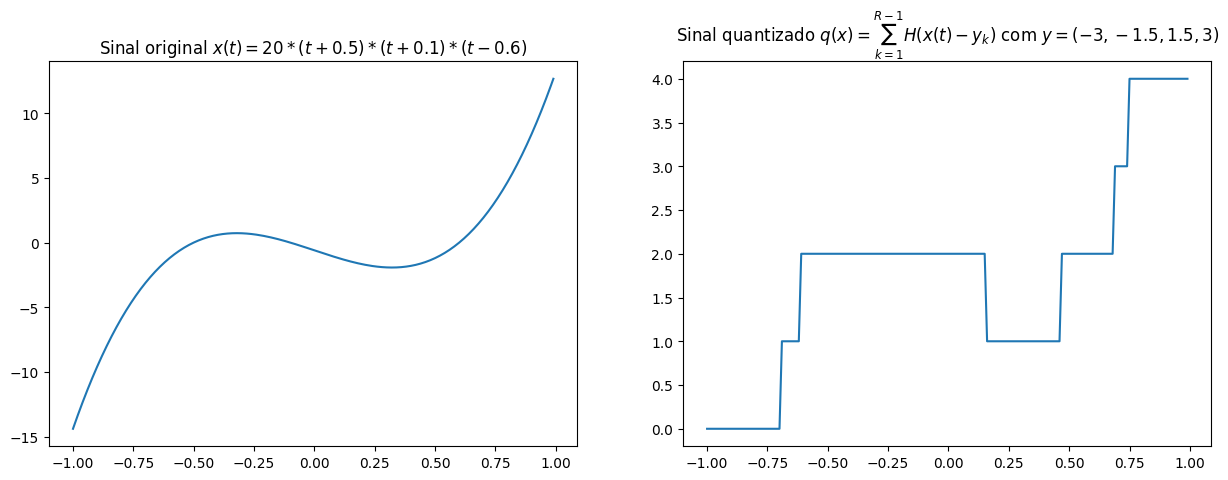

In [3]:
# Exemplo adicional
t = np.arange(-1,1,1/100); x = 20*(t+0.5)*(t+0.1)*(t-0.6); qx = sum(x-y[k]>0 for k in range(R))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1); ax.plot(t,x)
ax.set_title(r"Sinal original $x(t)=20*(t+0.5)*(t+0.1)*(t-0.6)$")
ax = fig.add_subplot(1, 2, 2); ax.plot(t,qx)
ax.set_title("Sinal quantizado $q(x)=\sum_{k=1}^{R-1}H(x(t)-y_k)$ com $y=(-3,-1.5,1.5,3)$")
plt.show()

### Generalização do esquema de dequantização

Considere $R$ valores (*codewords*) $z_0,z_1,\ldots,z_{R-1}$ tais que $z_k\in S_k=(y_k,y_{k+1}]$. Então a função de dequantização é definida por

$$\tilde{q}(k) = z_k,$$

e um sinal quantizado $w=(\ldots,w_j,\ldots)$ será dequantizado como

$$\tilde{q}(w)=(\ldots,\tilde{q}(w_j),\ldots)=(\ldots,z_{w_j},\ldots).$$

Um sinal $x=(\ldots,x_k,\ldots)$, após a quantização e dequantização, será reconstruído como

$$\tilde{x} = \tilde{q}(q(x)) = (\ldots,\tilde{q}(q(x_k)),\ldots) = (\ldots,z_{q(x_k)},\ldots).$$

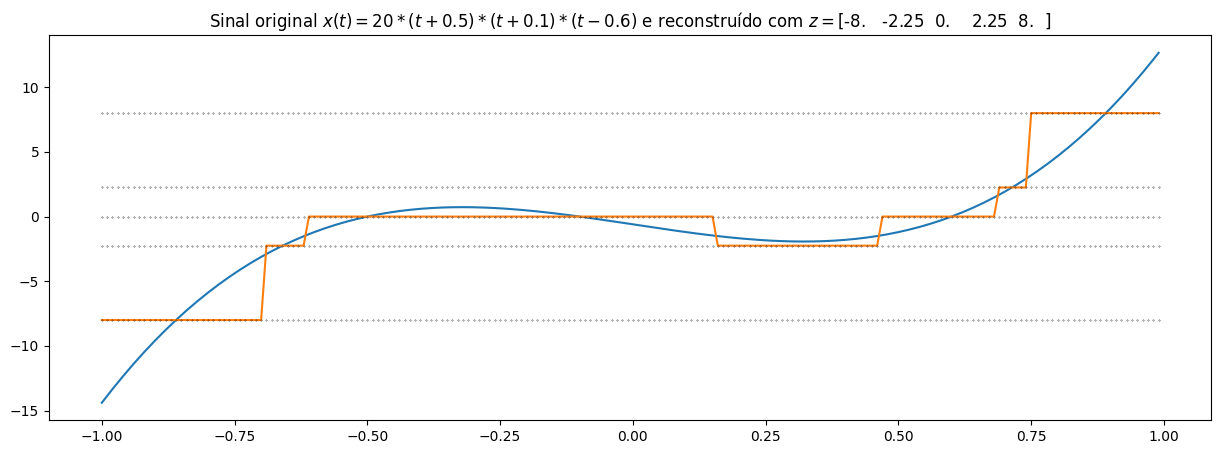

In [4]:
plt.figure(figsize=(15,5))
z = np.concatenate([[y[0]-5],0.5*(y[0:R-1]+y[1:R]),[y[R-1]+5]])
qqx = z[qx]; plt.plot(t,x,t,qqx)
tt = np.arange(-1,1,0.01)
for k in range(R+1): plt.plot(tt,0*tt+z[k],".k",ms=0.5)
plt.title(r"Sinal original $x(t)=20*(t+0.5)*(t+0.1)*(t-0.6)$ e reconstruído com $z=${}".format(z))
plt.show()

### Quantização/dequantização linear

Nesse esquema, os vetores $y$ e $z$ são definidos de forma **equiespaçada**. Por exemplo, para sinais entre $[-1,+1]$ e uma quantização de $B$ bits ($2^B$ intervalos de tamanho $\frac{2}{2^B}$), podemos definir
$$\begin{array}{l}y_0=-1\\\vdots\\y_k = -1+k\frac{2}{2^B}\\\vdots\\y_{2^B}=+1\end{array}\quad\quad
e\quad\quad
\begin{array}{l}z_0 = \frac{y_0+y_1}{2} = -1+\frac{1}{2^B}\\\vdots\\z_k = \frac{y_k+y_{k+1}}{2} = -1+\frac{1}{2^B}+k\frac{2}{2^B}\\\vdots\\ z_{2^B-1}=\frac{y_{2^B-1}+y_{2^B}}{2}=+1-\frac{1}{2^B}.\end{array}$$

Um outro mecanismo de quantização linear, mais fácil de implementar, pode ser obtido usando a truncagem para números inteiros. Nesse caso definimos
$$q(z) = \text{int}\left(z\cdot 2^{B-1}\right)$$
obtendo valores inteiros entre $-2^{B-1}$ e $2^{B-1}$. A rigor estaríamos usando $2^B+1$ códigos, mas podemos descartar um dos extremos para usar exatamente $B$ bits. Depois, poderíamos reconstruir o sinal fazendo simplesmente
$$\tilde{q}(k) = \frac{k}{2^{B-1}}.$$

A diferença principal entre os dois esquemas anteriores está no posicionamento dos intervalos:

- no primeiro caso, $y_{2^{B-1}}=0$ estaria na fronteira de dois intervalos;

- no segundo caso $z=0$ seria o representante no ponto médio do intervalo $\left(-\frac{1}{2^{B-1}}\ \ ,+\frac{1}{2^{B-1}}\right)$.

### Medidas de erro de quantização em sinais

O erro de quantização é definido como a diferença $x-\tilde{x}$. É comum usarmos a energia do erro $\|x-\tilde{x}\|^2$ como medida da distorção acarretada pelo processo de quantização. Ainda mais útil é considerar a razão entre a energia do erro e a energia do sinal:
$$\frac{\|x-\tilde{x}\|^2}{\|x\|^2}\quad\quad\text{ou}\quad\quad 100\frac{\|x-\tilde{x}\|^2}{\|x\|^2}\%.$$
Através da escolha dos parâmetros da quantização (número de bits e distribuição dos intervalos de quantização) podemos em princípio encontrar mapas $q$ e $\tilde{q}$ que otimizem a medida de erro acima para um dado sinal $x$.

### Exemplo 1.26 (adaptado)

In [5]:
analog = ToggleButton(value=True, description='Mostrar Sinal original', layout=Layout(width='auto'))
error = ToggleButton(value=False, description='Mostrar Erro de Quantização', layout=Layout(width='auto'))
bits = IntSlider(1, min=1, max=8, step=1, description='profundidade de Bits', 
                 continuous_update=False, style={'description_width': 'initial'},
                 layout=Layout(width='50%'))
N = 100

def pltsubsampledsignal(analog, error, bits):
    t = np.arange(0,4 * m.pi, 1/800)
    x = 0.75 * np.sin(3 * t) + 0.5 * np.sin(7 * t)
    # Normaliza o sinal amostrado entre 0 e 1-ε
    lb = min(x)
    ub = max(x)
    xsnorm = (1-np.finfo(float).eps)*(x - lb) / (ub - lb)
    # Quantiza usando 2^bits valores [0...2^(bits-1)]
    steps = 2 ** bits
    xqnorm = np.floor(steps * xsnorm)
    # Coloca de volta na faixa de valores originais [lb...ub], usando como codewords os valores
    # médios das 16 faixas entre lb e ub
    xq = (ub - lb) * xqnorm / steps + lb + 0.5 * (ub - lb) / steps
    # Amostra o sinal quantizado com N amostras
    #xqs = [xq[i] if i % int(len(x)/N + 1)== 0 else None for i in range(len(x))]
    # Gera o gráfico
    plt.figure(figsize=(15,4))
    plt.axhline(y=0.0, color='gray', linestyle='--', ms=1)
    if analog:
        plt.plot(t, x, label='Sinal "analógico"')
    if error:
    #    xqs_err = [xq[i] - x[i] if i % int(len(x)/N + 1)== 0 else None for i in range(len(x))]
        plt.plot(t, xq - x, '-', ms=5, label='Erro de quantização', color='green')
    plt.plot(t, xq, '-', ms=5, label='Sinal amostrado', color='orange')
    plt.ylim([-1.5,1.5])
    plt.xlim([0, max(t)])
    plt.title(r'Sinal $x(t) =  0.75\sin(3t)+0.5\sin(7t)$ quantizado com {0} bits. Erro de quantização = {1:.3f}%'.format(bits,100*np.linalg.norm(x-xq)**2/np.linalg.norm(x)**2),
              fontdict = {'fontsize' : 14})
    plt.ylabel('amplitude')
    plt.xlabel('tempo (s)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [6]:
w = interactive(pltsubsampledsignal, N=N,error=error, analog=analog, bits=bits)
display(VBox([w.children[3], w.children[2], HBox(w.children[0:2],
                                                 layout=Layout(justify_content='space-around', margin='10px'))]))

w.update()

### Quantização e medidas de erro de quantização em imagens

O processo de quantização em imagens é definido exatamente da mesma maneira que para sinais, afinal a quantização não diz respeito ao domínio do sinal e sim à sua imagem (valores das amostras). Assim, podemos usar os mesmos tipos de mapa de quantização ($q$) e dequantização ($\tilde{q}$): $A\longrightarrow q(A)\longrightarrow \tilde{A} = \tilde{q}(q(A))$, onde

$$q(A) = \left(\begin{array}{ccc}\ddots&\vdots&\\\cdots&q(a_{i,j})&\cdots\\&\vdots&\ddots\end{array}\right)\quad e\quad \tilde{A} = \left(\begin{array}{ccc}\ddots&\vdots&\\\cdots&z_{q(a_{i,j})}&\cdots\\&\vdots&\ddots\end{array}\right).$$

O erro relativo na quantização em imagens é dado por $\frac{\|A-\tilde{A}\|^2}{\|A\|^2}.$

### Exemplo 1.26 adaptado

In [7]:
bits = IntSlider(1, min=1, max=8, step=1, description='profundidade de Bits', 
                 continuous_update=False, style={'description_width': 'initial'},
                 layout=Layout(width='50%'))
density = 200;x = np.arange(0, 1, 1 / density);y = np.arange(1, 0, -1 / density);x, y = np.meshgrid(x, y)
f = 0.5*np.cos(11*y)+ 0.75*np.sin(8*x)
# Normaliza a função para o intervalo [0,1], para representar uma imagem em tons de cinza.
lb = np.min(np.min(f)) # lower bound da função
ub = np.max(np.max(f)) # upper bound
g = (f-lb)/(ub-lb)     # mapeia linearmente em [0, 1]

def pltimage(B):
    gq = np.floor(2**B*g)/2**B+1/2**(B+1)
    plt.figure(figsize=(7, 5))
    plt.title(r'Sinal $f(t) =  0.5\cos(11y)+0.75\sin(8x)$ quantizado com {0} bits. Erro de quantização = {1:.4f}%'.format(B,100*np.linalg.norm(g-gq)**2/np.linalg.norm(g)**2),
              fontdict = {'fontsize' : 16})
    
    plt.imshow(gq, cmap='binary_r', interpolation='none', vmin=0, vmax=1 )
    plt.axis('off')
    plt.show()

In [8]:
w = interactive(pltimage, B=bits)
w.update()
AppLayout(
    footer=HBox([w.children[0]], layout=Layout(justify_content='center')),
    center=HBox([w.children[1]], layout=Layout(justify_content='center'))
)

AppLayout(children=(HBox(children=(IntSlider(value=1, continuous_update=False, description='profundidade de Bi…

**Observação:** pularemos a seção 1.10